# PyTorch Computer Vision

https://www.learnpytorch.io/03_pytorch_computer_vision/

## 0. Computer vision libaries in Python

* `torchvision.datasets` - get datasets and data loading functions for CV 
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problem
* `torchvision.transform` - functions for manipulation your vision data (images) to be suitable with ML Model 
* `torch.utils.data.Dataset` - Base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Create a PyThon iterable over a dataset

In [1]:
import torch 
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor 

import matplotlib.pyplot as plt 


print(torch.__version__)
print(torchvision.__version__)

2.8.0+cu126
0.23.0+cu126


### 1. Getting a Dataset

The dataset wel'll be using is FashionMNIST

In [2]:
# Setup training data 
train_data = datasets.FashionMNIST(
    root ="data",  # where data to downloaded
    train = True, # do we want the training datasets
    download = True,  #do we want download yes/no
    transform = torchvision.transforms.ToTensor(),  # how to we want to transform the data
    target_transform= None # How do we want to transform the labels/target 
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True, 
    transform= ToTensor(),
    target_transform= None 
)


In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes    

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
# Check the shape of our model
print(f"Image Shape: {image.shape} -> [Color Channels, Height, Width]")
print(f"Image Label: {class_names[label]}")

Image Shape: torch.Size([1, 28, 28]) -> [Color Channels, Height, Width]
Image Label: Ankle boot


### 1.2 Visualizing our data

Image Shape torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

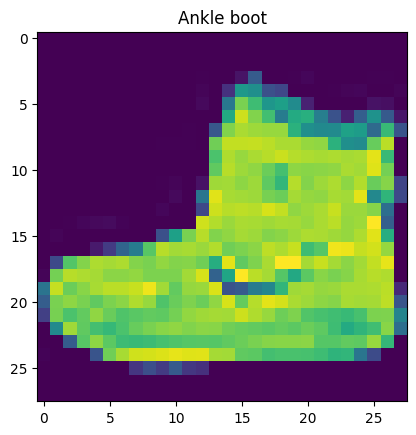

In [9]:
import matplotlib.pyplot as plt 
image, label = train_data[0]
print(f"Image Shape {image.shape}")
plt.imshow(image.squeeze())
plt.title(class_names[label])

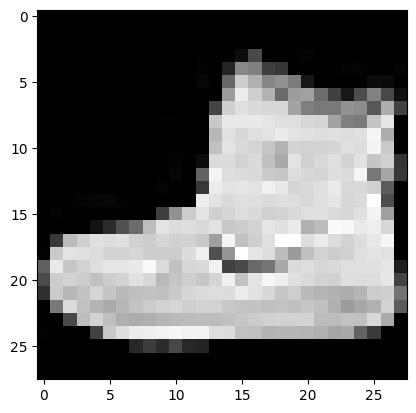

In [10]:
plt.imshow(image.squeeze(), cmap = "gray")


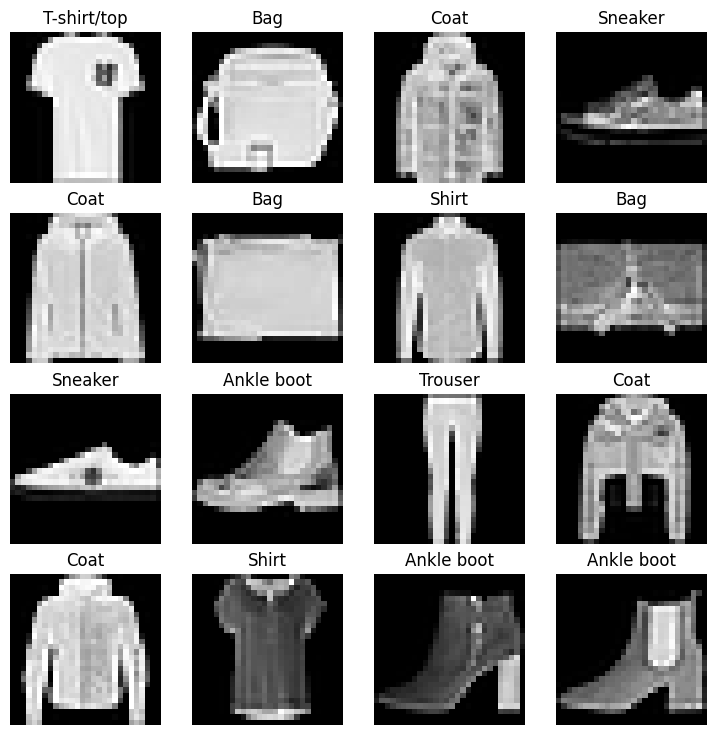

In [11]:
# plot more images 
# torch.manual_seed(42)
fig = plt.figure(figsize = (9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size = [1]).item()
    # print(random_idx)
    img, label = train_data[random_idx] 
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(),cmap= "gray")
    plt.title(class_names[label])
    plt.axis(False)

Do You think thesse items of clothing (images) could be modelled with pure linear lines? Or do you think we'll need non-linearities

In [12]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare Data Loader

Right now, our data is in thee form of PyTorch Datasets

DataLoader turn our dataset into a Python iterable

More specifiacally, we want to turn our data into batches (or mini-batches).

why would we do this? 
1. It is more computationally efficient, as in your computing hardware my not be able to look (store in memory) at 60000 images in one hit. 
2. It gives our neural network more chance to update its gradients per epochs 




In [13]:
from torch.utils.data import DataLoader 

# setup the batch size hyperparameter 
BATCH_SIZE = 32

# Turn Datasets into iterables  (batches)
train_dataloader = DataLoader(dataset = train_data, batch_size= BATCH_SIZE, shuffle= True)

test_dataloader =DataLoader(dataset= test_data, batch_size= BATCH_SIZE, shuffle= False )

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x189670870e0>,
 <torch.utils.data.dataloader.DataLoader at 0x189653cf390>)

In [14]:
# Lets check out what we've created 
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of Train_DataLoader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of Test_DataLoader: {len(test_dataloader)} batches of {BATCH_SIZE}...")


DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x00000189670870E0>, <torch.utils.data.dataloader.DataLoader object at 0x00000189653CF390>)
Length of Train_DataLoader: 1875 batches of 32...
Length of Test_DataLoader: 313 batches of 32...


In [15]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape

torch.Size([32, 1, 28, 28])

Image size: torch.Size([1, 28, 28])
Label 1, label size: torch.Size([])


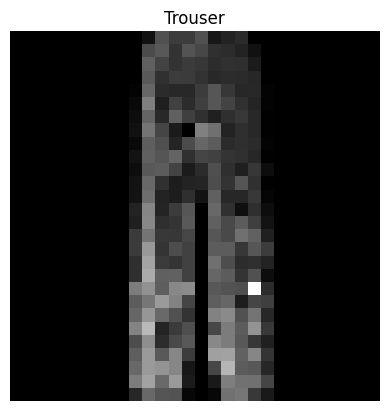

In [16]:
# Show a sample
random_idx = torch.randint(0, len(train_features_batch),size = [1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap ="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {image.shape}")
print(f"Label {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model 

When starting to build a series of machine learning experiements, its best practice to start with a baseline model 

A baseline model is a simpel model you will try and improve upon with subsequent models/experiments

In other words: start simply and add complexity when necessary  

In [17]:
# Create a flatten layer 

flatten_model = nn.Flatten()

# Get a single sample 
x = train_features_batch[0]


output = flatten_model(x)
print(f"Shape before flattening: {x.shape} -> [Color_channels, height, width]")
print(f"Shape after flattening: {output.shape}[color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [Color_channels, height, width]
Shape after flattening: torch.Size([1, 784])[color_channels, height*width]


In [18]:
from torch import nn 
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape : int, hidden_units :int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, hidden_units),
            nn.Linear(hidden_units, output_shape)
        )    
        
    def forward(self,x):
        return self.layer_stack(x)

In [19]:
torch.manual_seed(42)

# Setup model with input parameter
model_0 = FashionMNISTModelV0(
    input_shape=784, # this 28*28
    hidden_units= 10, # how many units in the hidden layer
    output_shape= len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### 3.1 Setup loss, optimizier and evaluation metrics

* Loss function - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation metric - since we're working on a classification problem, let's use acc as our eval metric

In [21]:
from helper_function import accuracy_fn 

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)

### 3.2 Create a function to time our experiments

Machine learning is very experimental. 

Two of the main thing you'll often want to track are:
1. Model's Performance (loss, acc values, etc)
2. How fast it runs

In [22]:
### 3.2 Create a function to time our experiments
from timeit import default_timer as timer 

def print_train_time(start: float, end:float, device: torch.device=None):
    """Prints difference between start and end time."""
    total_time = end -start 
    print(f"train time on {device} : {total_time:.3f}")
    return total_time

In [23]:
star_time = timer()



end_time = timer() 

print_train_time(start = star_time, end= end_time)

train time on None : 0.000


2.8500000553322025e-05

### 3.3 Create a training loop and training a model on batches of data

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss **per batches**
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening
5. Time it all (for fun)

In [41]:
# import tqdm
from tqdm.auto import tqdm 

torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 15

# Create training and test loop 
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}")
    # training
    train_loss = 0
    # add a loop to toop through the training batches 
    for batch, (X,y) in enumerate(train_dataloader):
        model_0.train()
        # 1.Forward Pass
        y_pred = model_0 (X)
        
        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred,y)
        train_loss += loss # accumulate train loss 
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        
        # 4. Loss Backward
        loss.backward()
        
        # 5. Optimizer Step 
        optimizer.step()
        
        # print out whats happening 
        if batch %400 == 0:
            print(f"Looked at {batch *len(X)/len(train_dataloader.dataset)}")
            
            
    # Divide total train loss by lenght of train dataloader 
    train_loss /= len(train_dataloader)
    
    #  testing 
    test_loss, test_acc = 0,0
    model_0.eval()
    with torch.inference_mode():
        for X,y in test_dataloader:
            # 1. Forward pess
            test_pred = model_0(X)
            
            # 2. Calculate loss
            test_loss += loss_fn(test_pred, y)

            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true = y, y_pred = test_pred.argmax(dim = 1))
    
    # caculate the test loss average per batch 
        test_loss /= len(test_dataloader)
        
        #  Calculate the test acc average per batch\
        test_acc /= len(test_dataloader)
        
        
    # print whats happening 
    print(f"\n Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")
    
# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(train_time_start_on_cpu, train_time_end_on_cpu,device=str(next(model_0.parameters()).device))

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 0
Looked at 0.0
Looked at 0.21333333333333335
Looked at 0.4266666666666667
Looked at 0.64
Looked at 0.8533333333333334

 Train Loss: 0.4362 | Test Loss: 0.4617 | Test Acc: 83.8059
Epoch: 1
Looked at 0.0
Looked at 0.21333333333333335
Looked at 0.4266666666666667
Looked at 0.64
Looked at 0.8533333333333334

 Train Loss: 0.4312 | Test Loss: 0.4626 | Test Acc: 83.9956
Epoch: 2
Looked at 0.0
Looked at 0.21333333333333335
Looked at 0.4266666666666667
Looked at 0.64
Looked at 0.8533333333333334

 Train Loss: 0.4261 | Test Loss: 0.4644 | Test Acc: 83.9257
Epoch: 3
Looked at 0.0
Looked at 0.21333333333333335
Looked at 0.4266666666666667
Looked at 0.64
Looked at 0.8533333333333334

 Train Loss: 0.4218 | Test Loss: 0.4565 | Test Acc: 83.8159
Epoch: 4
Looked at 0.0
Looked at 0.21333333333333335
Looked at 0.4266666666666667
Looked at 0.64
Looked at 0.8533333333333334

 Train Loss: 0.4194 | Test Loss: 0.4608 | Test Acc: 83.4465
Epoch: 5
Looked at 0.0
Looked at 0.21333333333333335
Looked at 0.

In [31]:
len(train_dataloader.dataset)

60000

## 4. Make prediction and get Model 0 Results

In [39]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    loss, acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            y_pred = model(X)
            loss+= loss_fn(y_pred,y)
            acc+= accuracy_fn(y_true=y, y_pred = y_pred.argmax(dim = 1))
            
    # Scale loss and acc to find the average loss/acc per batch
        loss/= len(data_loader)
        acc/= len(data_loader)
    
    return{"model_name" : model.__class__.__name__, # only works when model was created with class
           "model_loss" : loss.item(),
           "model_acc" : acc}
    
# Calculate model_0 result on test dataset
model_0_results = eval_model(model = model_0, data_loader= test_dataloader,loss_fn = loss_fn , accuracy_fn= accuracy_fn)

model_0_results
    

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47143012285232544,
 'model_acc': 83.57627795527156}

## 5. Setup Agnostic Code (USING GPU)

In [40]:
device = "cuda"

## 6. Model 1: Building a better model with non-linearity

We learned  about the power of non-linearity in notebook 02

In [48]:
# Create a mddel  with non-linear and linear-layer
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, hidden_units),
            nn.ReLU(),
            nn.Linear(input_shape, output_shape),
            nn.ReLU()     
        )
        
    def forward(self, x:torch.Tensor):
        return self.layer_stack(x)

In [49]:
# Create an instance of model_1 
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(784, 10, len(class_names)).to(device)

### 6.1  Setup Loss, Optimizer dan evaluation metrics 

In [ ]:
from helper_function import accuracy_fn 

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

### 6.2 Functionizing training and evaluation testing loop

lets create a function for:
* training loop = `train_step()`
* testing loop = `test_step()`

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               optimizer: torch.optim.Optimizer, accuracy_fn, 
               device: torch.device = device):
    train_loss = 0
    # Put model in training mode 
    model.train()
    # add a loop to toop through the training batches 
    for batch, (X,y) in enumerate(data_loader):
        X,y = X.to(device), y.to(device)
        # 1.Forward Pass
        y_pred = model(X)
        
        # 2. Calculate loss and acc (per batch)
        loss = loss_fn(y_pred,y)
        train_loss += loss # accumulate train loss 
        train_acc +=accuracy_fn(y,y_pred.argmax(dim =1))
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        
        # 4. Loss Backward
        loss.backward()
        
        # 5. Optimizer Step 
        optimizer.step()
        
        # print out whats happening 
            
            
    # Divide total train loss and acc  by length of train dataloader 
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train Loss: {train_loss:.5f} | Train Acc: {train_acc:.2f}")

In [ ]:
def test_step(model: torch.nn.Module,
              data_loader = torch.utils.data.DataLoader)